In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import module.process_signs as ps
import cv2
import os
import numpy as np

### Data 1

In [2]:
path= 'after_filter/data_1/'
df = pd.DataFrame()

for i in range(15):
    temp_df=ps.load_data(path+str(i))
    df=pd.concat([df,temp_df],ignore_index=True)

df

,filename,path,width,height
0,00000_00000_00013.png,after_filter/data_1/0/00000_00000_00013.png,224,224
1,00000_00000_00014.png,after_filter/data_1/0/00000_00000_00014.png,224,224
2,00000_00000_00015.png,after_filter/data_1/0/00000_00000_00015.png,224,224
3,00000_00000_00016.png,after_filter/data_1/0/00000_00000_00016.png,224,224
4,00000_00000_00017.png,after_filter/data_1/0/00000_00000_00017.png,224,224
...,...,...,...,...
17289,016_1_0066.png,after_filter/data_1/14/016_1_0066.png,224,224
17290,016_1_0067.png,after_filter/data_1/14/016_1_0067.png,224,224
17291,016_1_0068.png,after_filter/data_1/14/016_1_0068.png,224,224
17292,016_1_0069.png,after_filter/data_1/14/016_1_0069.png,224,224


In [4]:
df.shape

(17294, 4)

In [32]:
test=df
test

,filename,path,width,height
0,00000_00000_00000.png,after_resize/data_1/0/00000_00000_00000.png,224,224
1,00000_00000_00001.png,after_resize/data_1/0/00000_00000_00001.png,224,224
2,00000_00000_00002.png,after_resize/data_1/0/00000_00000_00002.png,224,224
3,00000_00000_00003.png,after_resize/data_1/0/00000_00000_00003.png,224,224
4,00000_00000_00004.png,after_resize/data_1/0/00000_00000_00004.png,224,224
...,...,...,...,...
19325,016_1_0066.png,after_resize/data_1/14/016_1_0066.png,224,224
19326,016_1_0067.png,after_resize/data_1/14/016_1_0067.png,224,224
19327,016_1_0068.png,after_resize/data_1/14/016_1_0068.png,224,224
19328,016_1_0069.png,after_resize/data_1/14/016_1_0069.png,224,224


In [33]:
def sharpening(image_path):
    image=cv2.imread(image_path)
    
    # Chuyển đổi ảnh sang thang độ xám
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Áp dụng bộ lọc Laplacian
    laplacian = cv2.Laplacian(gray_image, cv2.CV_64F)
    
    # Chuyển đổi ảnh Laplacian về kiểu dữ liệu uint8
    laplacian = cv2.convertScaleAbs(laplacian)
    
    # Chuyển đổi ảnh Laplacian về ảnh RGB
    laplacian_rgb = cv2.cvtColor(laplacian, cv2.COLOR_GRAY2BGR)
    
    # Tạo ảnh làm nét bằng cách cộng ảnh gốc với ảnh Laplacian với trọng số cao hơn
    sharpened = cv2.addWeighted(image, 1.0, laplacian_rgb, 5.0, 0)
    return sharpened

In [7]:
def blur(image_path):
    image=cv2.imread(image_path)
    
    # Áp dụng bộ lọc Gaussian
    blurred = cv2.GaussianBlur(image, (5, 5), 0)
    return blurred

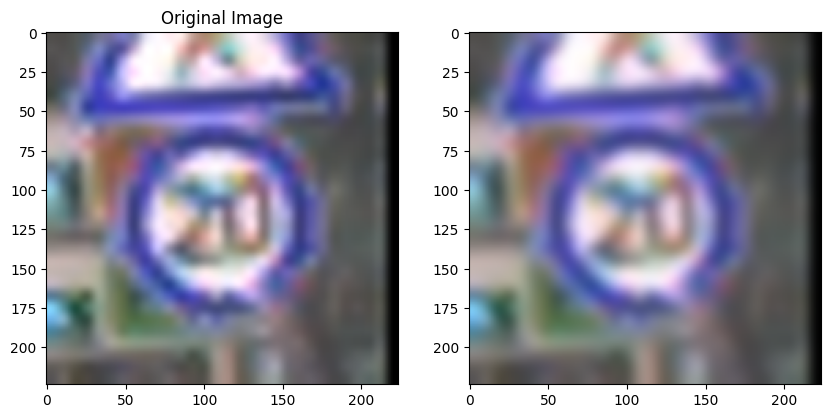

In [34]:
s_img=sharpening(df['path'][0])
or_img=cv2.imread(df['path'][0])
# show img compare with original image
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(or_img)
plt.title('Original Image')
plt.subplot(1,2,2)
plt.imshow(s_img)

In [8]:
def total_blur():    
    new_path='after_fblur'
    
    for index, row in df.iterrows():
        _img=blur(row['path'])
        n_p=row['path'].replace('after_filter',new_path)
        # Tạo thư mục nếu chưa tồn tại
        dir_name = os.path.dirname(n_p)
        if not os.path.exists(dir_name):
            os.makedirs(dir_name)
        
        # Lưu ảnh
        if not cv2.imwrite(n_p, _img):
            print('Could not write image')  
            break
total_blur()

In [41]:
def sharpening():    
    new_path='after_sharpening'
    
    for index, row in df.iterrows():
        _img=blur(row['path'])
        n_p=row['path'].replace('after_resize',new_path)
        # Tạo thư mục nếu chưa tồn tại
        dir_name = os.path.dirname(n_p)
        if not os.path.exists(dir_name):
            os.makedirs(dir_name)
        
        # Lưu ảnh
        if not cv2.imwrite(n_p, _img):
            print('Could not write image')  
            break
sharpening()